In [1]:


# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [2]:
df=pd.read_csv("dataset11 (1).csv")
df

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,5464,200,181,5,0,66
1,6041,100,197,8,0,66
2,25,100,0,5,0,66
3,5461,100,174,4,0,66
4,6915,200,223,5,500,66
...,...,...,...,...,...,...
89,702,200,23,3,0,64
90,133,100,4,2,0,64
91,153,100,0,8,0,64
92,500,300,0,5,500,64


In [3]:
df.head()
df.sample(10)

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
39,4005,300,139,8,500,64
25,4550,300,150,8,500,64
4,6915,200,223,5,500,66
10,3148,100,101,8,0,65
92,500,300,0,5,500,64
41,4136,300,137,5,500,64
72,4921,100,158,5,500,64
40,4880,300,164,4,500,64
34,4683,300,154,9,0,64
58,4064,300,131,8,500,64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
step_count         94 non-null int64
mood               94 non-null int64
calories_burned    94 non-null int64
hours_of_sleep     94 non-null int64
bool_of_active     94 non-null int64
weight_kg          94 non-null int64
dtypes: int64(6)
memory usage: 4.5 KB


In [5]:
print(df.shape)
print(df.describe())



(94, 6)
        step_count        mood  calories_burned  hours_of_sleep  \
count    94.000000   94.000000        94.000000       94.000000   
mean   2896.010638  210.638298        92.851064        5.223404   
std    2114.027525   84.837714        70.016735        1.532124   
min      25.000000  100.000000         0.000000        2.000000   
25%     717.000000  100.000000        22.250000        4.000000   
50%    2987.500000  200.000000        96.000000        5.000000   
75%    4517.500000  300.000000       148.250000        6.000000   
max    7102.000000  300.000000       234.000000        9.000000   

       bool_of_active  weight_kg  
count       94.000000  94.000000  
mean       212.765957  64.287234  
std        248.537244   0.632835  
min          0.000000  64.000000  
25%          0.000000  64.000000  
50%          0.000000  64.000000  
75%        500.000000  64.000000  
max        500.000000  66.000000  


In [6]:
df.groupby('bool_of_active').size()

bool_of_active
0      54
500    40
dtype: int64

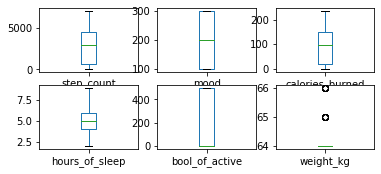

In [7]:
df.plot(kind='box', subplots=True,layout=(3,3), sharex=False, sharey=False)
plt.show()

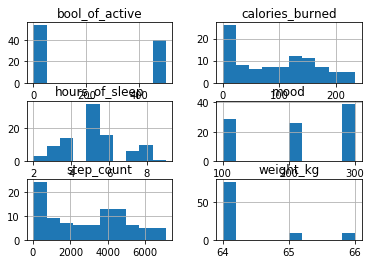

In [8]:
df.hist()
plt.show()

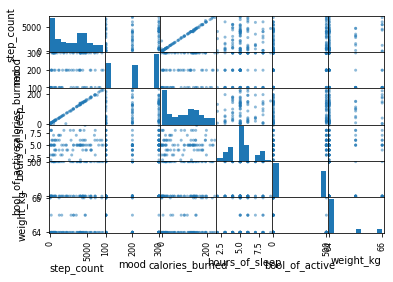

In [9]:
scatter_matrix(df)
plt.show()

In [10]:
# Split dataset into train, test and validation sets

X = df.step_count # Target variable
Y = df.calories_burned 
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)



In [11]:
# Building and evaluating  classification Algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



In [13]:
# evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[ 539.  546. 5195. 4275. 4779.  995.  202. 6041.  570. 4136.  702. 2127.
 1648. 3148. 6676.  753. 1831. 2255. 5464.  181.  437. 6041.  518.  177.
 5376. 5461. 4033.   36. 1696. 5999. 6915. 3149.  299. 1258. 5537. 4683.
 4061. 1867. 1163. 6500. 2209.  774. 2374.  651. 5934. 3881. 4340. 3608.
 3575. 5464.  269. 1230. 6930.  500. 4005.   61.  705. 4921. 2599. 1580.
 1421.  330. 3066. 7102. 4550. 3941. 4421.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

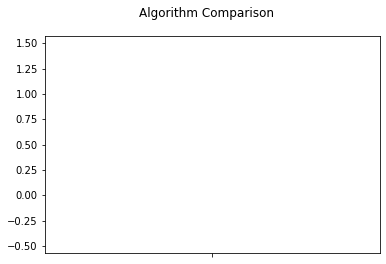

In [14]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
# Make predictions on validation with  KNeighbors Classifier


knn =KNeighborsClassifier() 
knn.fit(X_train, Y_train)
predictions=knn.predict(X_validation)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))




ValueError: Expected 2D array, got 1D array instead:
array=[ 153   25 3158  799 4545 1231 4108 1447  539  546 5195 4275 4779  995
  202 6041  570 4136  702 2127 1648 3148 6676  753 1831 2255 5464  181
  437 6041  518  177 5376 5461 4033   36 1696 5999 6915 3149  299 1258
 5537 4683 4061 1867 1163 6500 2209  774 2374  651 5934 3881 4340 3608
 3575 5464  269 1230 6930  500 4005   61  705 4921 2599 1580 1421  330
 3066 7102 4550 3941 4421].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
# Make predictions on validation with  SVC Classifier


SVM =SVC() 
SVM.fit(X_train, Y_train)
predictions=SVM.predict(X_validation)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))




0.47368421052631576
[[ 9  0]
 [10  0]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         9
         500       0.00      0.00      0.00        10

    accuracy                           0.47        19
   macro avg       0.24      0.50      0.32        19
weighted avg       0.22      0.47      0.30        19



/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Make predictions on validation with  DecisionTreeClassifier
CART =DecisionTreeClassifier() 
CART.fit(X_train, Y_train)
predictions=CART.predict(X_validation)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))




0.631578947368421
[[7 2]
 [5 5]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
         500       0.71      0.50      0.59        10

    accuracy                           0.63        19
   macro avg       0.65      0.64      0.63        19
weighted avg       0.65      0.63      0.63        19

